# Лабораторная работа 5. Свёрточные нейронные сети.


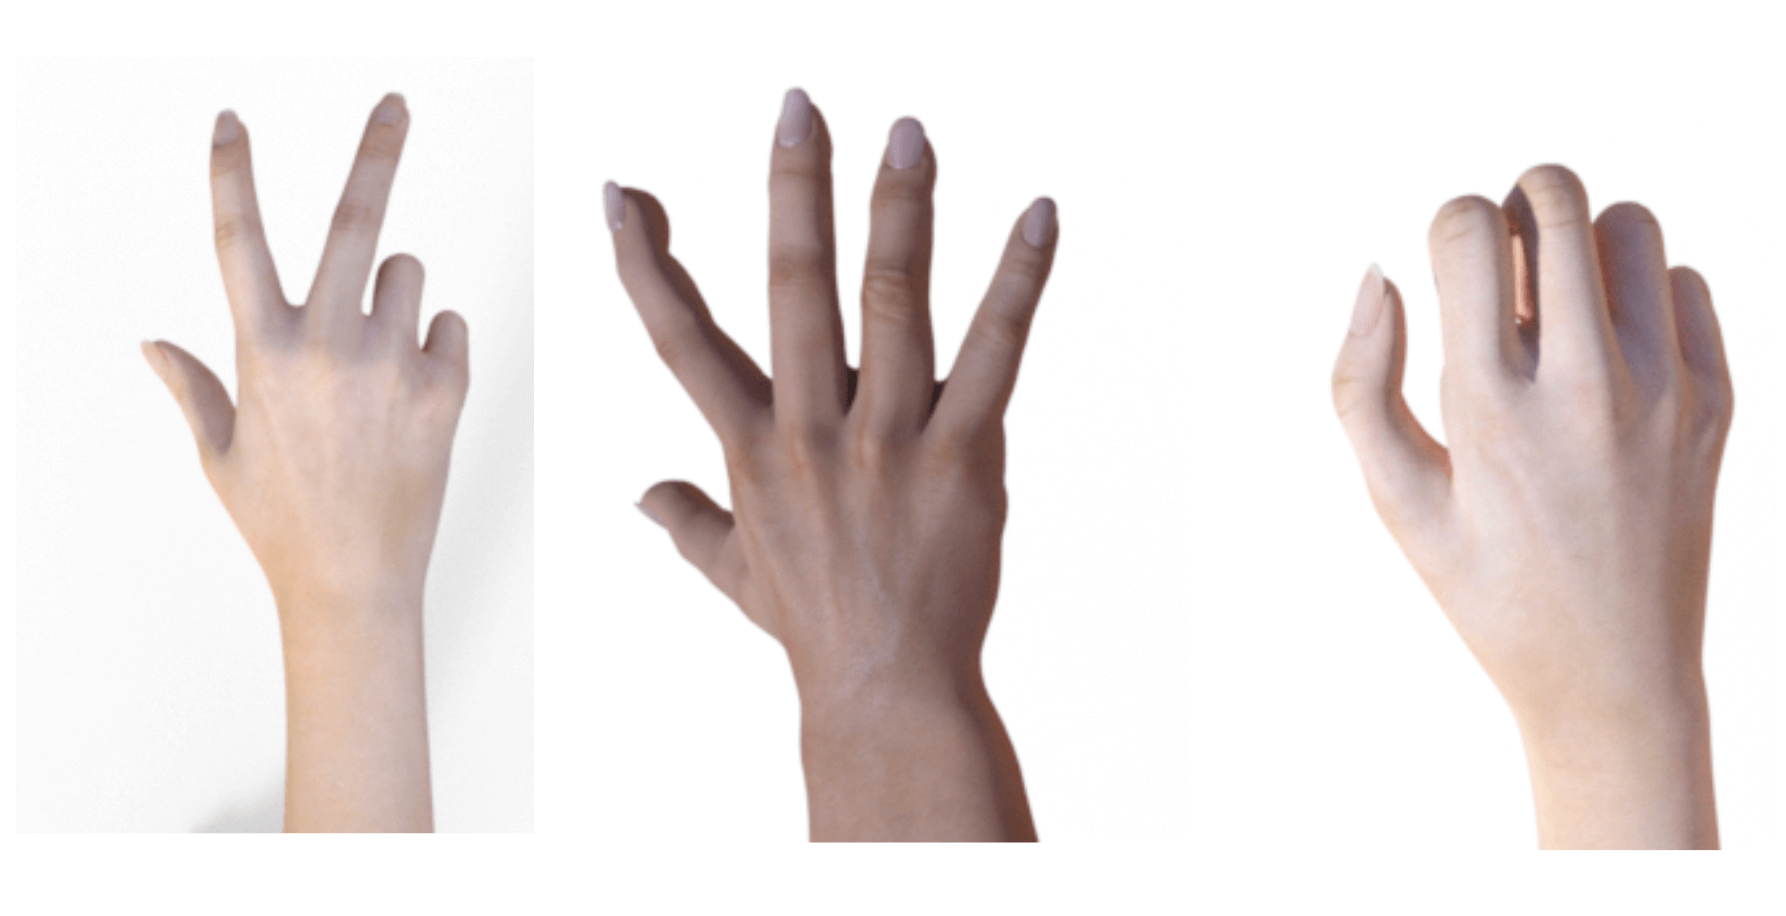

### 1.Начните с загрузки датасета “камень-ножницы-бумага” (Rock-Paper-Scissors). Вы можете скачать его по ссылке или проверить, доступен ли он через встроенные средства torchvision. Для удобной работы с данными используйте класс torchvision.datasets.ImageFolder, который автоматически организует изображения по папкам, соответствующим классам.

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torchvision
import torch
import matplotlib.image as mpimg

In [103]:
sns.set_theme(style="whitegrid", palette="tab10")

In [104]:
train = torchvision.datasets.ImageFolder("Rock-Paper-Scissors/train")
test = torchvision.datasets.ImageFolder("Rock-Paper-Scissors/test")
# df_train = torch.utils.data.DataLoader(train)
# df_test= torch.utils.data.DataLoader(train)
# df = torch.utils.data.ConcatDataset([train, test])

###        2. После загрузки определите общее количество изображений в датасете. Затем подсчитайте, сколько изображений относится к каждому из трех классов: "камень", "ножницы" и "бумага". Постройте гистограмму, чтобы показать распределение изображений по классам.

In [105]:
# print(f"Размер датасета: {len(test)}")
# print(f"Размер датасета: {len(train)}")
# print(f"Количество классова: {test.classes }")
# print(f"Количество классова: {train.classes }")

In [106]:
data = pd.concat([pd.DataFrame(train.samples),pd.DataFrame(test.samples)])
data.rename(columns={0:"X", 1:"Y"}, inplace=True)
data


,X,Y
0,Rock-Paper-Scissors/train/paper/paper01-000.png,0
1,Rock-Paper-Scissors/train/paper/paper01-001.png,0
2,Rock-Paper-Scissors/train/paper/paper01-002.png,0
3,Rock-Paper-Scissors/train/paper/paper01-003.png,0
4,Rock-Paper-Scissors/train/paper/paper01-004.png,0
...,...,...
367,Rock-Paper-Scissors/test/scissors/testscissors...,2
368,Rock-Paper-Scissors/test/scissors/testscissors...,2
369,Rock-Paper-Scissors/test/scissors/testscissors...,2
370,Rock-Paper-Scissors/test/scissors/testscissors...,2


Количество объектов

In [107]:
data.count()

X    2892
Y    2892
dtype: int64

In [108]:
print(f"Количество классов: {data.Y.nunique()}")

Количество классов: 3


Количество по классам

In [109]:
data.groupby("Y").count()

,X
Y,
0,964
1,964
2,964


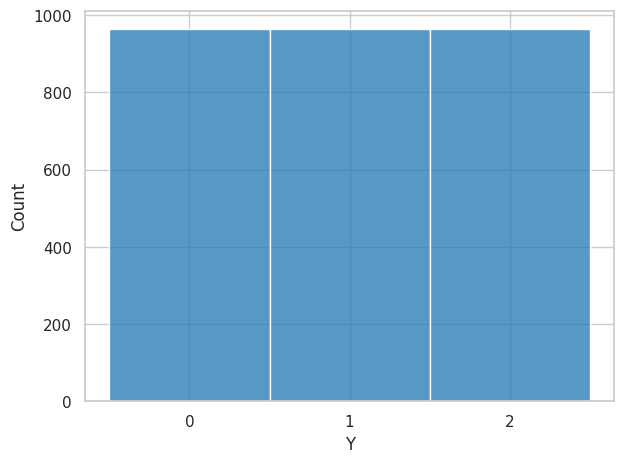

In [110]:
sns.histplot(data.Y.astype("str"),bins=data.Y.nunique())
plt.tight_layout()

### 3.Напишите функцию, которая выбирает по одному случайному изображению из каждого класса и отображает их. Убедитесь, что рядом с каждым изображением указана его метка (например, "камень"). Затем расширьте визуализацию: выберите несколько случайных изображений из датасета (например, 5–6) и отобразите их в виде сетки, также указав их классы. Это даст вам представление о разнообразии данных.

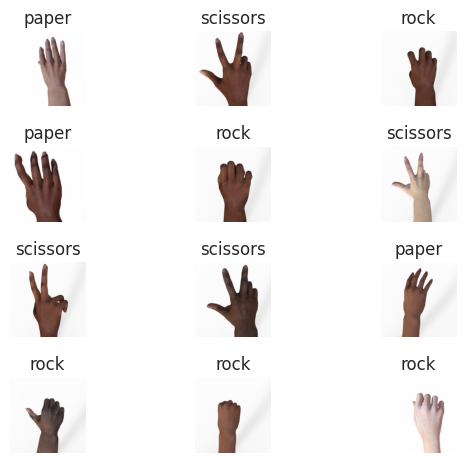

In [111]:
def imshow(data:pd.DataFrame, n=1, cls=None):
    if cls:
        images = data[data.Y == cls].sample(n)
    else:
        images = data.sample(n)
    classes = {0:'paper', 1:'rock', 2:'scissors'}
    cnt = images.shape[0]
    fig, axs = plt.subplots(int(np.ceil(np.sqrt(cnt))), int(np.sqrt(cnt)))
    for (i,(PATH, _class)),ax in zip(enumerate(images.values), axs.ravel()):
        # print(PATH)
        image = mpimg.imread(PATH)
        ax.imshow(image), #title=classes[_class])
        ax.set_title(classes[_class])
        ax.grid()
        ax.axis('off')
    plt.tight_layout()
    plt.show()

imshow(data, n=12)

###      4. Используйте модуль torchvision.transforms для создания набора трансформаций:
        a. Преобразуйте изображения в тензоры с помощью ToTensor().
        b. Выполните масштабирование данных (например, среднее [0.5, 0.5, 0.5] и стандартное отклонение [0.5, 0.5, 0.5] для RGB-каналов).
        c. Примените эти трансформации к датасету через параметр transform в ImageFolder.


In [112]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Normalize(
        mean=[0.5,0.5,0.5],
        std=[0.5,0.5,0.5]
    ),
    torchvision.transforms.ToTensor()
])

In [113]:
train_trans = torchvision.datasets.ImageFolder(
    root='Rock-Paper-Scissors/train',
    transform=transform
)
test_trans = torchvision.datasets.ImageFolder(
    root='Rock-Paper-Scissors/test',
    transform=transform
)

In [117]:
# data_trans = pd.concat([pd.DataFrame(train_trans.samples),pd.DataFrame(test_trans.samples)])
# data_trans.rename(columns={0:"X", 1:"Y"}, inplace=True)
# data_trans


In [116]:
# imshow(data_trans, 9)